# Introduction: 
L’accès à une énergie fiable reste un défi de taille en Afrique subsaharienne, où de nombreuses régions dépendent de générateurs ou de systèmes solaires autonomes. Cependant, la production d’énergie solaire peut fluctuer sous l’effet de multiples facteurs : conditions météorologiques, demande locale, infrastructures disponibles, etc.

Ce défi de prévision est essentiel pour permettre aux décideurs d’allouer au mieux l’énergie disponible et d’identifier les zones prioritaires pour les installations solaires supplémentaires. En travaillant sur ce problème, vous contribuez à la mission de transformer l’accès à l’électricité en Afrique !

### **Objectif de la Compétition**
Développer un modèle de régression performant pour prédire la **demande énergétique projetée** (`demande_energetique_projectee`) dans différentes régions. Les modèles les plus précis permettront de prioriser les zones où les infrastructures énergétiques pourraient être optimisées.


# Imports

In [1]:
# Pour le chargement et la manipulation des datasets
import pandas as pd
import numpy as np

# Pour les plots
import matplotlib.pyplot as plt
import seaborn as sns

# Others
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')

# I- Loading the dataset 📦 and Exploratory data analysis 

## 1- Chargement des donnnées et première impréssions

In [2]:
train_df = pd.read_csv('datas/train.csv')
test_df = pd.read_csv("datas/test.csv")
submission_df = pd.read_csv('datas/submission.csv')

### **<span style="color:#999999;">First samples</span>**

In [3]:
train_df.head()

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
0,Zimbabwe,-19.0154,29.1549,14862924,5.004870,485.085906,544.232257,583.128945,3936.978948,926.985577,...,14.282752,2.575677,67.501053,35.733884,4,rocheux,555.209808,0.441787,traditionnel,2
1,Congo (Brazzaville),-0.2280,15.8277,5518092,4.609972,1422.802172,1864.048290,163.908475,3753.749894,862.739803,...,41.408913,2.747196,61.851008,40.134654,2,sablonneux,3722.310275,0.380139,traditionnel,5
2,Namibia,-22.9576,18.4904,2540905,5.792826,4711.082367,5525.433108,1404.435659,3804.854034,1298.932535,...,41.259170,3.091990,17.384882,46.964564,5,argileux,9824.421047,0.678362,moderne,0
3,Somalia,5.1521,46.1996,15893222,4.104030,799.426659,1447.543617,1370.179083,2047.305693,1256.611785,...,21.930857,3.639728,21.744383,40.211287,1,rocheux,9407.183123,0.731126,moderne,7
4,Congo (Kinshasa),-4.0383,21.7587,89561403,6.103335,2526.920477,3029.604497,962.398626,3421.335117,1484.398731,...,37.127657,6.572047,47.679339,63.201230,3,argileux,9184.154421,0.357112,moderne,2


In [4]:
test_df.head()

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
0,Guinea,9.9456,-9.6966,13132795,4.127216,1742.542776,2157.259405,1021.851235,3835.946683,872.520272,...,NaN,7.379525,76.425479,35.358111,5,rocheux,4048.488123,0.328018,moderne,7
1,Mauritania,21.0079,-10.9408,4649658,5.008540,255.495071,428.684740,1617.543567,2739.032034,1096.259730,...,49.593022,1.084977,57.176834,49.970568,4,argileux,6999.991146,0.400916,traditionnel,5
2,South Africa,-30.5595,22.9375,59308690,6.976930,3768.494240,5678.901223,946.143038,2011.915469,938.680998,...,10.298804,6.788885,78.470385,61.007593,5,argileux,6697.363318,0.397704,moderne,1
3,Lesotho,-29.6099,28.2336,2142249,5.076239,2060.610984,2315.866464,1962.312061,2002.905853,990.823495,...,27.431191,7.556819,88.105215,55.505618,1,argileux,2178.227735,0.527368,moderne,0
4,Comoros,-11.6455,43.3333,869601,6.462166,2080.772325,2952.531976,623.492275,3800.268025,1157.289352,...,41.894886,5.920871,31.325681,47.514292,4,rocheux,6494.836948,0.425716,traditionnel,7


In [5]:
submission_df.head()

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
0,Sierra Leone,8.4606,-11.7799,7976983,6.016310,2288.205830,1506.365949,3856.453895,1453.281847,56.433841,25.196118,9.187338,35.022992,58.938006,2,sablonneux,9432.861305,0.722109,traditionnel,3
1,Sierra Leone,8.4606,-11.7799,7976983,6.410925,2402.680846,1878.297944,3652.332264,1076.560589,46.100498,27.037202,5.307233,52.154399,58.293952,4,argileux,7466.567405,0.518997,traditionnel,3
2,South Sudan,6.8769,31.3069,11193725,4.642565,3996.471566,344.400305,3810.507756,980.596863,88.583926,47.880078,1.462924,79.302572,24.914731,2,sablonneux,1239.535797,0.785365,moderne,9
3,Mozambique,-18.6657,35.5296,31255435,5.704522,3134.406856,1614.664206,3319.984749,1373.043279,45.876645,40.282065,5.420247,47.551657,35.089942,3,sablonneux,7052.913351,0.400865,traditionnel,9
4,Zimbabwe,-19.0154,29.1549,14862924,6.581508,2560.551232,1151.776893,2829.581194,895.661665,91.039562,10.630429,3.527300,75.120867,46.989207,5,rocheux,9744.951246,0.516602,traditionnel,6


In [6]:
print(f"{Fore.RED}--> {Fore.RESET} L'ensemble de train comporte {Fore.YELLOW}{train_df.shape[0]}{Fore.RESET} observations et  {Fore.YELLOW}{train_df.shape[1]}{Fore.RESET} features")
print(f"{Fore.RED}--> {Fore.RESET} L'ensemble de test comporte {Fore.YELLOW}{test_df.shape[0]}{Fore.RESET} observations et {Fore.YELLOW}{test_df.shape[1]}{Fore.RESET} features")
print(f"{Fore.RED}--> {Fore.RESET} L'ensemble de submission comporte {Fore.YELLOW}{submission_df.shape[0]}{Fore.RESET} observations et {Fore.YELLOW}{submission_df.shape[1]}{Fore.RESET} features")

-->  L'ensemble de train comporte 150000 observations et  21 features
-->  L'ensemble de test comporte 62500 observations et 21 features
-->  L'ensemble de submission comporte 25000 observations et 20 features


### **<span style="color:#999999;">Data infos</span>**

In [7]:
def aggregate_info(df):
    ''' Calculate 
    count of unique, 
    unique values, 
    count & % of missing values, 
    data types of the columns '''
    nunique = df.nunique()
    unique = df.apply(lambda x: x.unique())
    missing_count = df.isna().sum()
    missing_percentage = round((df.isna().sum() / len(df)) * 100,2)
    dtypes = df.dtypes

    # combine metrics into a single DataFrame
    agg_df = pd.DataFrame({
        'nunique values': nunique,
        'unique': unique,
        'missing_count': missing_count,
        'missing_percentage': missing_percentage,
        'dtypes': dtypes
    })

    return agg_df

In [8]:
aggregate_info(train_df)

,nunique values,unique,missing_count,missing_percentage,dtypes
country,53,"[Zimbabwe, Congo (Brazzaville), Namibia, Somal...",0,0.00,object
lat,53,"[-19.0154, -0.228, -22.9576, 5.1521, -4.0383, ...",0,0.00,float64
lon,53,"[29.1549, 15.8277, 18.4904, 46.1996, 21.7587, ...",0,0.00,float64
population,53,"[14862924, 5518092, 2540905, 15893222, 8956140...",0,0.00,int64
taux_ensoleillement,150000,"[5.004869957733355, 4.60997218528352, 5.792825...",0,0.00,float64
demande_energetique_actuelle,150000,"[485.08590613926174, 1422.8021720993795, 4711....",0,0.00,float64
demande_energetique_projectee,150000,"[544.2322571315573, 1864.0482898919824, 5525.4...",0,0.00,float64
capacite_installee_actuelle,150000,"[583.1289453477796, 163.9084747822526, 1404.43...",0,0.00,float64
duree_ensoleillement_annuel,150000,"[3936.9789477298655, 3753.7498941147496, 3804....",0,0.00,float64
cout_installation_solaire,150000,"[926.9855773232648, 862.7398031188507, 1298.93...",0,0.00,float64


In [9]:
aggregate_info(test_df)

,nunique values,unique,missing_count,missing_percentage,dtypes
country,53,"[Guinea, Mauritania, South Africa, Lesotho, Co...",0,0.00,object
lat,53,"[9.9456, 21.0079, -30.5595, -29.6099, -11.6455...",0,0.00,float64
lon,53,"[-9.6966, -10.9408, 22.9375, 28.2336, 43.3333,...",0,0.00,float64
population,53,"[13132795, 4649658, 59308690, 2142249, 869601,...",0,0.00,int64
taux_ensoleillement,62500,"[4.12721569472315, 5.008539892815465, 6.976930...",0,0.00,float64
demande_energetique_actuelle,62500,"[1742.5427763013777, 255.49507137803025, 3768....",0,0.00,float64
demande_energetique_projectee,62500,"[2157.2594051747133, 428.6847404846305, 5678.9...",0,0.00,float64
capacite_installee_actuelle,62500,"[1021.8512353963677, 1617.5435666714118, 946.1...",0,0.00,float64
duree_ensoleillement_annuel,62500,"[3835.946683443559, 2739.032034361064, 2011.91...",0,0.00,float64
cout_installation_solaire,62500,"[872.5202723962773, 1096.2597298762505, 938.68...",0,0.00,float64


In [10]:
aggregate_info(submission_df)

,nunique values,unique,missing_count,missing_percentage,dtypes
country,53,"[Sierra Leone, South Sudan, Mozambique, Zimbab...",0,0.00,object
lat,53,"[8.4606, 6.8769, -18.6657, -19.0154, -26.5225,...",0,0.00,float64
lon,53,"[-11.7799, 31.3069, 35.5296, 29.1549, 31.4659,...",0,0.00,float64
population,53,"[7976983, 11193725, 31255435, 14862924, 116016...",0,0.00,int64
taux_ensoleillement,25000,"[6.016310074889931, 6.410925405863468, 4.64256...",0,0.00,float64
demande_energetique_actuelle,25000,"[2288.205830361803, 2402.6808458985824, 3996.4...",0,0.00,float64
capacite_installee_actuelle,25000,"[1506.3659487025072, 1878.2979437437093, 344.4...",0,0.00,float64
duree_ensoleillement_annuel,25000,"[3856.4538953834185, 3652.332264110863, 3810.5...",0,0.00,float64
cout_installation_solaire,25000,"[1453.281846970627, 1076.5605889547166, 980.59...",0,0.00,float64
proximite_infrastructures_energetiques,25000,"[56.433841233288696, 46.10049764169625, 88.583...",0,0.00,float64


<font color=green> **Observations:** </font>

- Dans tous les trois jeux de données, la features <code>taux_adoption_energies_renouvelables</code> possède des valeurs manquantes, *10.09%* dans le jeu de  train, *10.04%* dans le jeu de test et *9.97%* dans le jeu de submission
- Nous pouvons observer des features catégorielles nominales et ordinales avec un nombre très bas de valeurs uniques. Nous devons donc vérifier si ces valeurs uniques sont les meme pour les trois jeux de données.
- Les distributions des valeurs dans les trois jeux de données sont similaires.
- Dans les trois jeux de données, en dehors de la features <code>taux_adoption_energies_renouvelables</code> la quasi totalité des features possède autant de valeurs uniques qu'il y'a d'observation. Donc il n'y a pas de répétition des valeurs dans la distribution de ces features. Il sera donc impossible de les normaliser.

In [11]:
columns_with_missing_values = ['taux_adoption_energies_renouvelables']

In [12]:
features = [col for col in train_df if train_df[col].nunique() <= 10] + ['country']
for feature in features:
    train_unique_values = sorted(train_df[feature].unique().tolist())
    test_unique_values = sorted(test_df[feature].unique().tolist())
    submission_unique_values = sorted(submission_df[feature].unique().tolist())
    assert(train_unique_values == test_unique_values == submission_unique_values )

Tout est nikel! Les variables catégorielles nominales et ordinales ont les memes valeurs uniques dans les trois jeux de données. 

### **<span style="color:#999999;">Lignes dupliquées</span>**

In [13]:
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

0

In [15]:
submission_df.duplicated().sum()

0

Nikel! Aucune ligne dupliquées dans les trois jeux de données.

## 2- Analyse Exploratoire des Données(EDA)

In [16]:
numerical_features = [col for col in train_df.columns if train_df[col].dtype != "object" and train_df[col].nunique() > 10 ]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == "object"] + \
                       [col for col in train_df.columns  if train_df[col].dtype != "object" and train_df[col].nunique() <= 10 ]
  
print(f"\n{Fore.RED}--> {Fore.RESET} Features numériques:  \n {numerical_features}")
print(f"\n{Fore.RED}--> {Fore.RESET} Features catégorielles: \n {categorical_features}")


-->  Features numériques:  
 ['lat', 'lon', 'population', 'taux_ensoleillement', 'demande_energetique_actuelle', 'demande_energetique_projectee', 'capacite_installee_actuelle', 'duree_ensoleillement_annuel', 'cout_installation_solaire', 'proximite_infrastructures_energetiques', 'taux_adoption_energies_renouvelables', 'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation', 'emissions_co2_evitees', 'idh']

-->  Features catégorielles: 
 ['country', 'types_sols', 'habit_de_mariage', 'potentiel_investissement', 'nombre_animaux_domestiques']


### 2.1- Analyse univariée

#### **<span style="color:#999999;">The target: </span>** `demande_energetique_projectee`

In [17]:
target = 'demande_energetique_projectee'

In [18]:
train_df.describe()[target]

count    150000.000000
mean       3896.053758
std        2304.560838
min         107.515374
25%        1949.653254
50%        3767.976294
75%        5594.079254
max        9981.053695
Name: demande_energetique_projectee, dtype: float64

[Text(0.5, 0, 'Distribution de demande_energetique_projectee')]

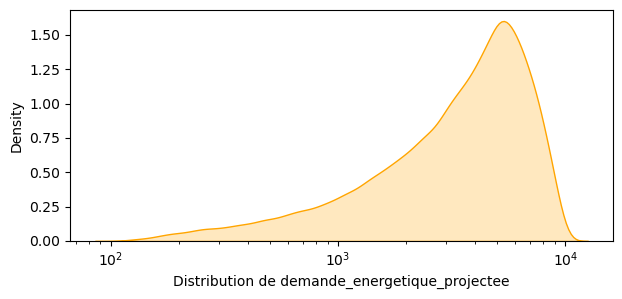

In [19]:
plt.figure(figsize=(7, 3))
ax = sns.kdeplot(train_df[target], color='orange', fill=True, log_scale=True)
ax.set(xlabel='Distribution de demande_energetique_projectee')

<font color=green> **Observations:** </font>

- On remarque que la target à une distribution étalée vers la gauche. Ce qui n'est que normale car celle-ci possède autant de valeurs uniques qu'il y'a d'observations. Ceci pose un défi, trouver un model capable d'établir une relation significative entre la target et les variables indépendantes.

<Axes: xlabel='demande_energetique_projectee'>

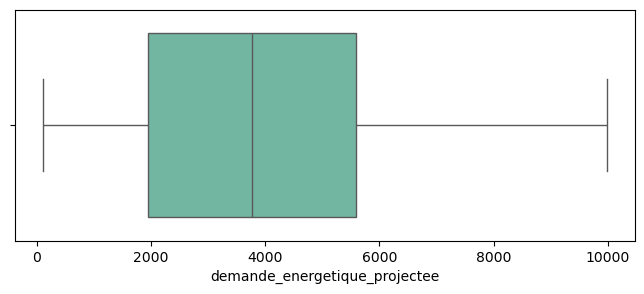

In [20]:
plt.figure(figsize=(8,3))
sns.boxplot(x=train_df[target], palette='Set2')

Aucun outlier!

#### **<span style="color:#999999;"> Other features </span>**

##### **<span style="color:#999999;">Numerical Features</span>**

In [21]:
# Helper function for plot
def plot(df, features_list, num_cols, kind="boxplot", bins=30, log_scale=False):
    num_cols = num_cols
    num_rows = (len(features_list) + num_cols - 1) // num_cols
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    
    axes = axs.flat
    
    for i, ax in enumerate(axes):
        if i < len(features_list):
            if kind == "boxplot":
                sns.boxplot(x=df[features_list[i]], palette='Set2', ax=ax)
                ax.set_title(f"{features_list[i]}")
            elif kind == "kdeplot":
                sns.kdeplot(df[features_list[i]], color='orange', fill=True, log_scale=log_scale, ax=ax)
                ax.set_title(f" {features_list[i]}")
            elif kind == 'countplot':
                sns.countplot(data=df, x=features_list[i], palette='Set2', ax=ax)
                ax.set_title(f"Count for {features_list[i]}")
                ax.tick_params(axis='x', rotation=90)
            elif kind == 'histplot':
                sns.histplot(data=df, x = features_list[i], bins = bins, kde=False, ax=ax)
                ax.set_title(f"{features_list[i]}")
            else:
                print("\nCe type de graphe n'est pas pris en compte!")
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

##### Kdeplots

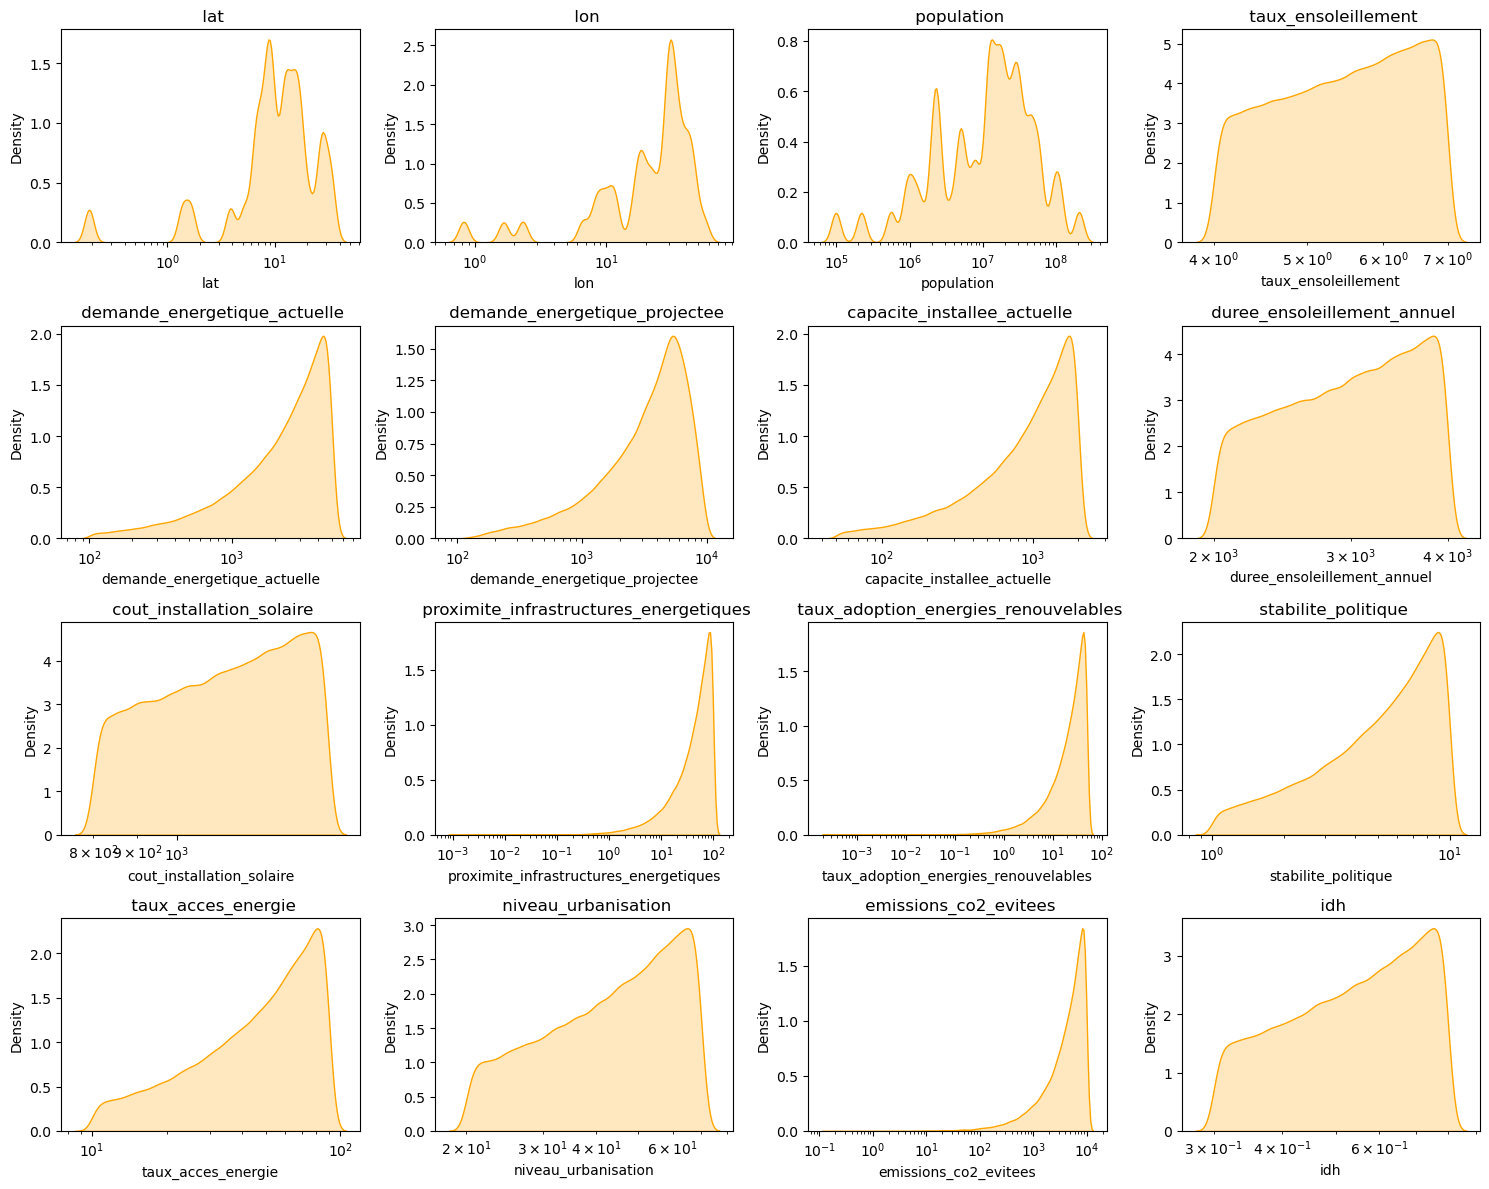

In [22]:
plot(train_df, numerical_features, 4, kind='kdeplot', log_scale=True)

##### Histplot

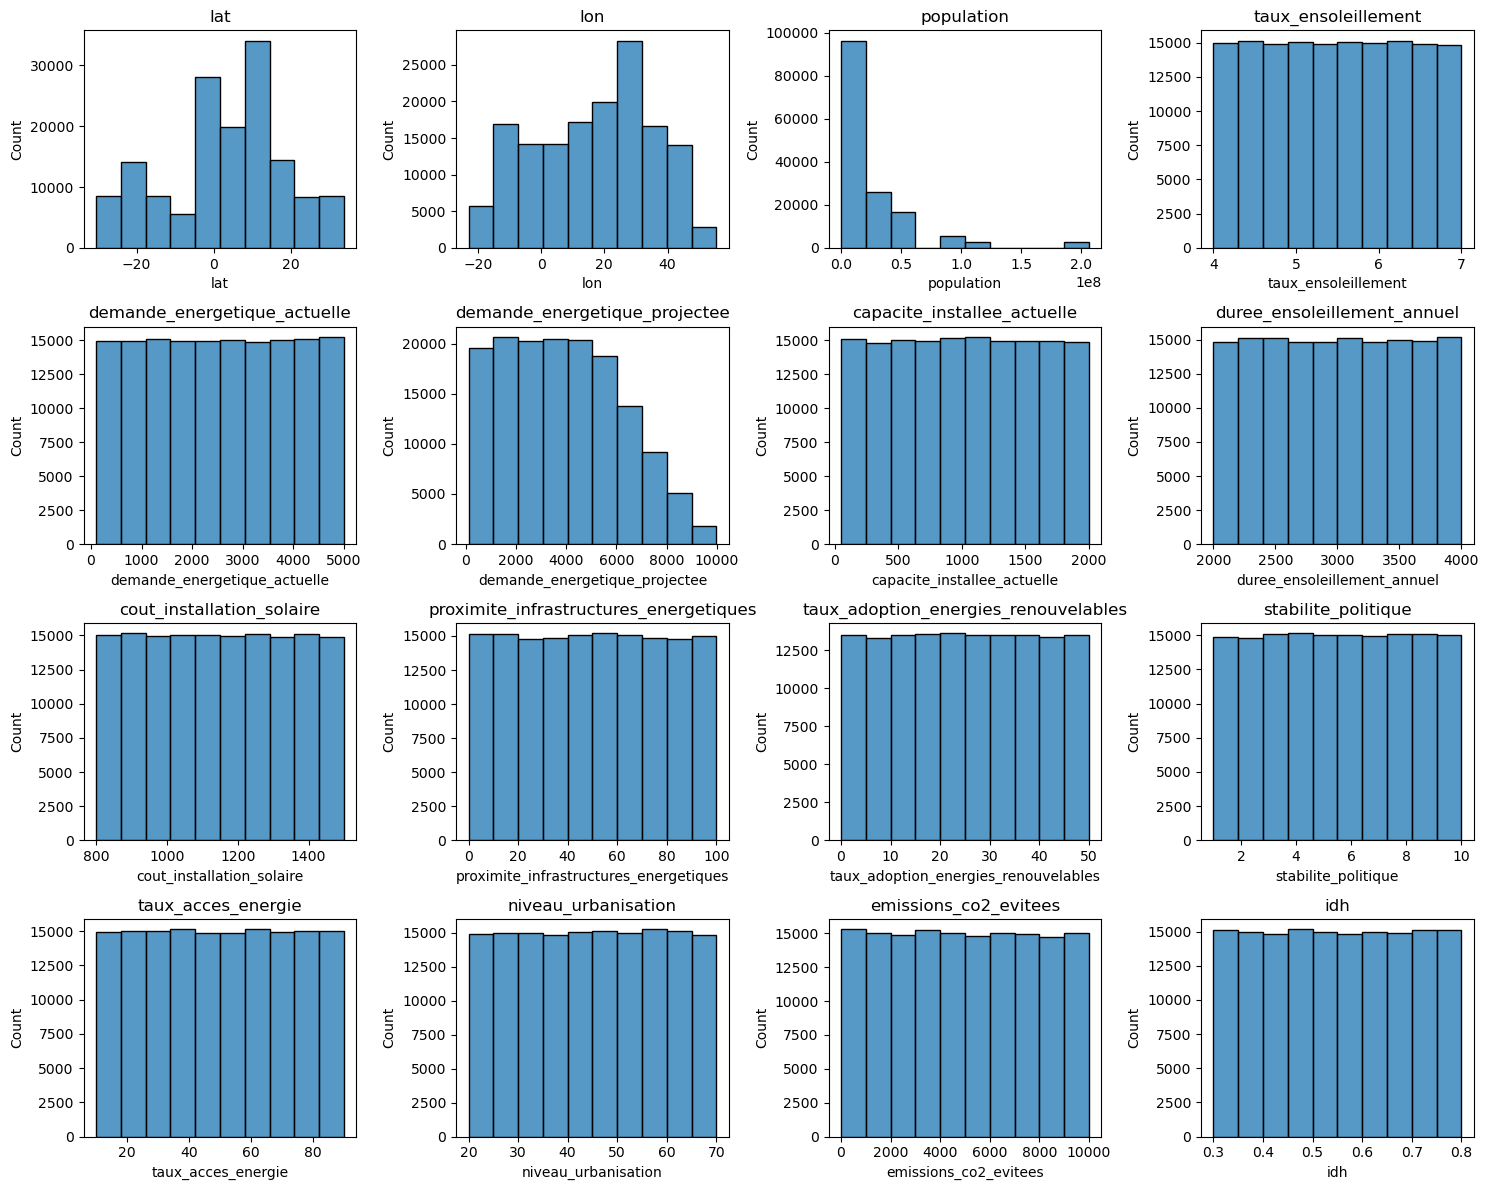

In [23]:
plot(train_df, numerical_features, 4, kind='histplot', bins=10)

<font color=green> **Obvervations:** </font>

- En dehors des features *lat*, *lon* et *population*, toutes les autres features numériques ont distribution évalées, ce qui n'est que normal car tout comme la target elles ont autant de valeurs uniques au qu'il y'a d'observations. Il sera donc impossible de les normaliser.
- Les features *lat*, *lon* et *population* ont toutes des distribution en forme de Zigzag, elles ne suivent aucune distribution parculière.

### Conclusion: 
- Les models basés sur l'hypothèse de la normalité des données ne seront donc pas appropriés.

##### Boxplots

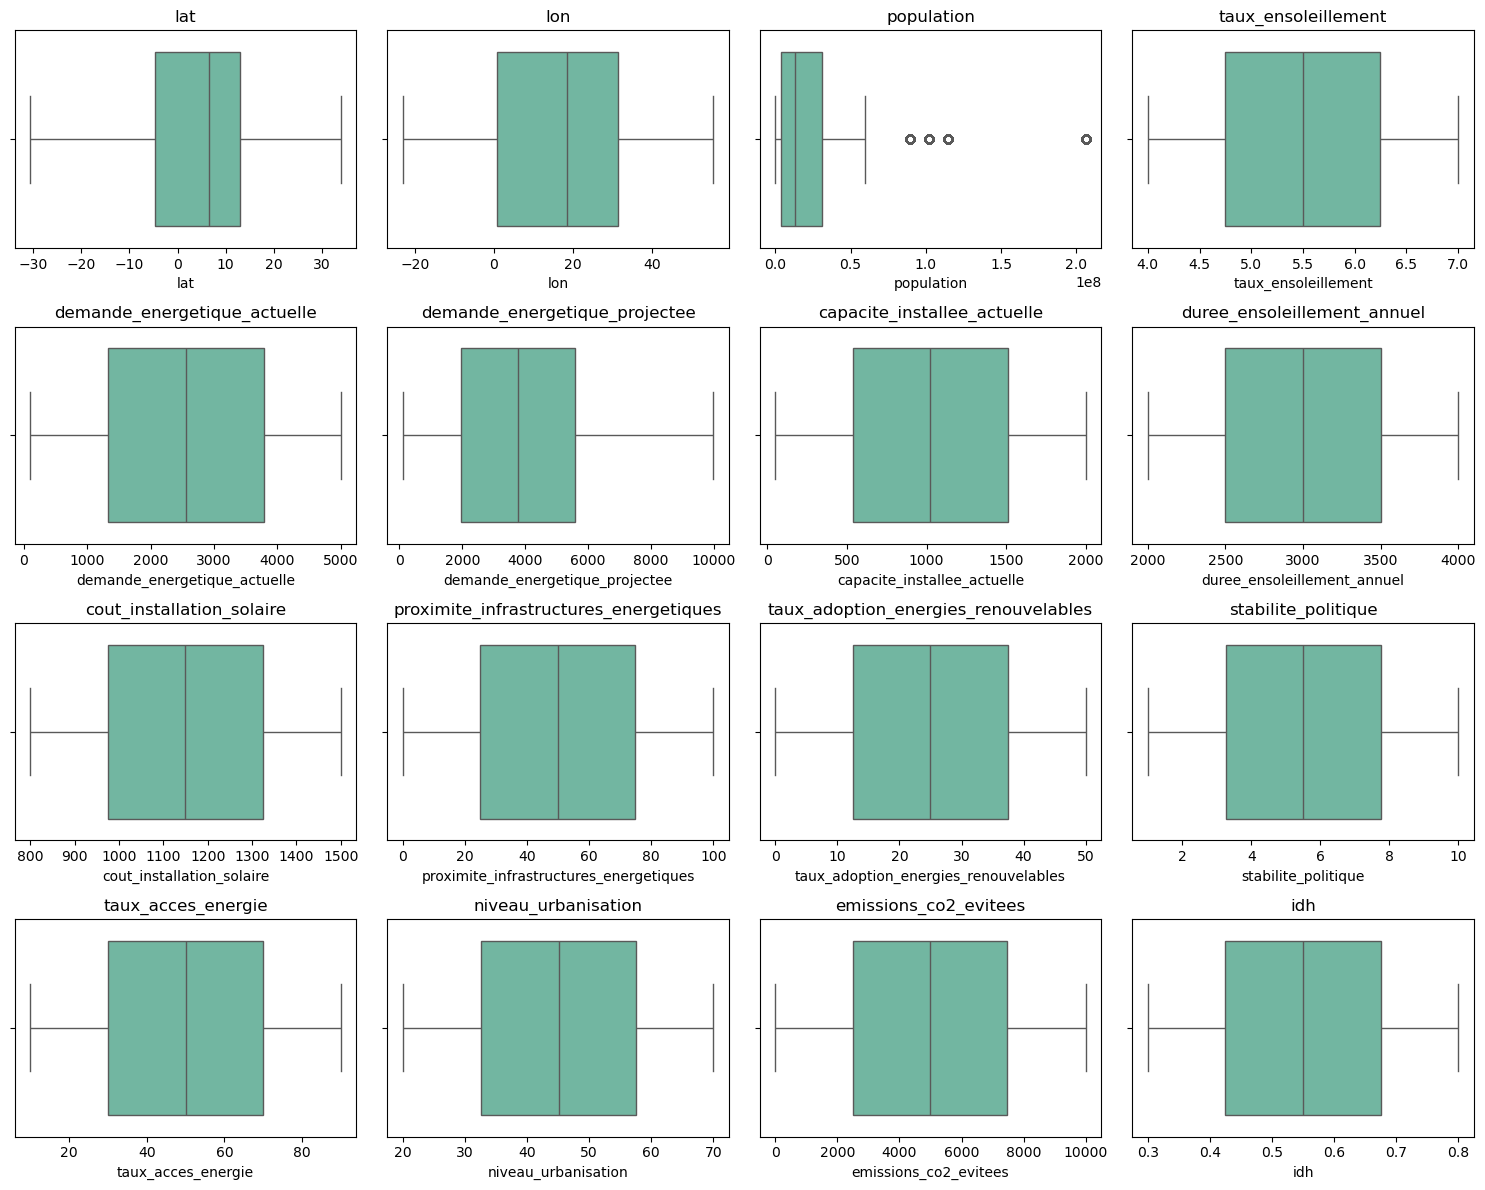

In [24]:
plot(train_df, numerical_features, 4, kind='boxplot')

<font color=green> **Obvervations:** </font>



##### **<span style="color:#999999;">Categorical Features</span>**

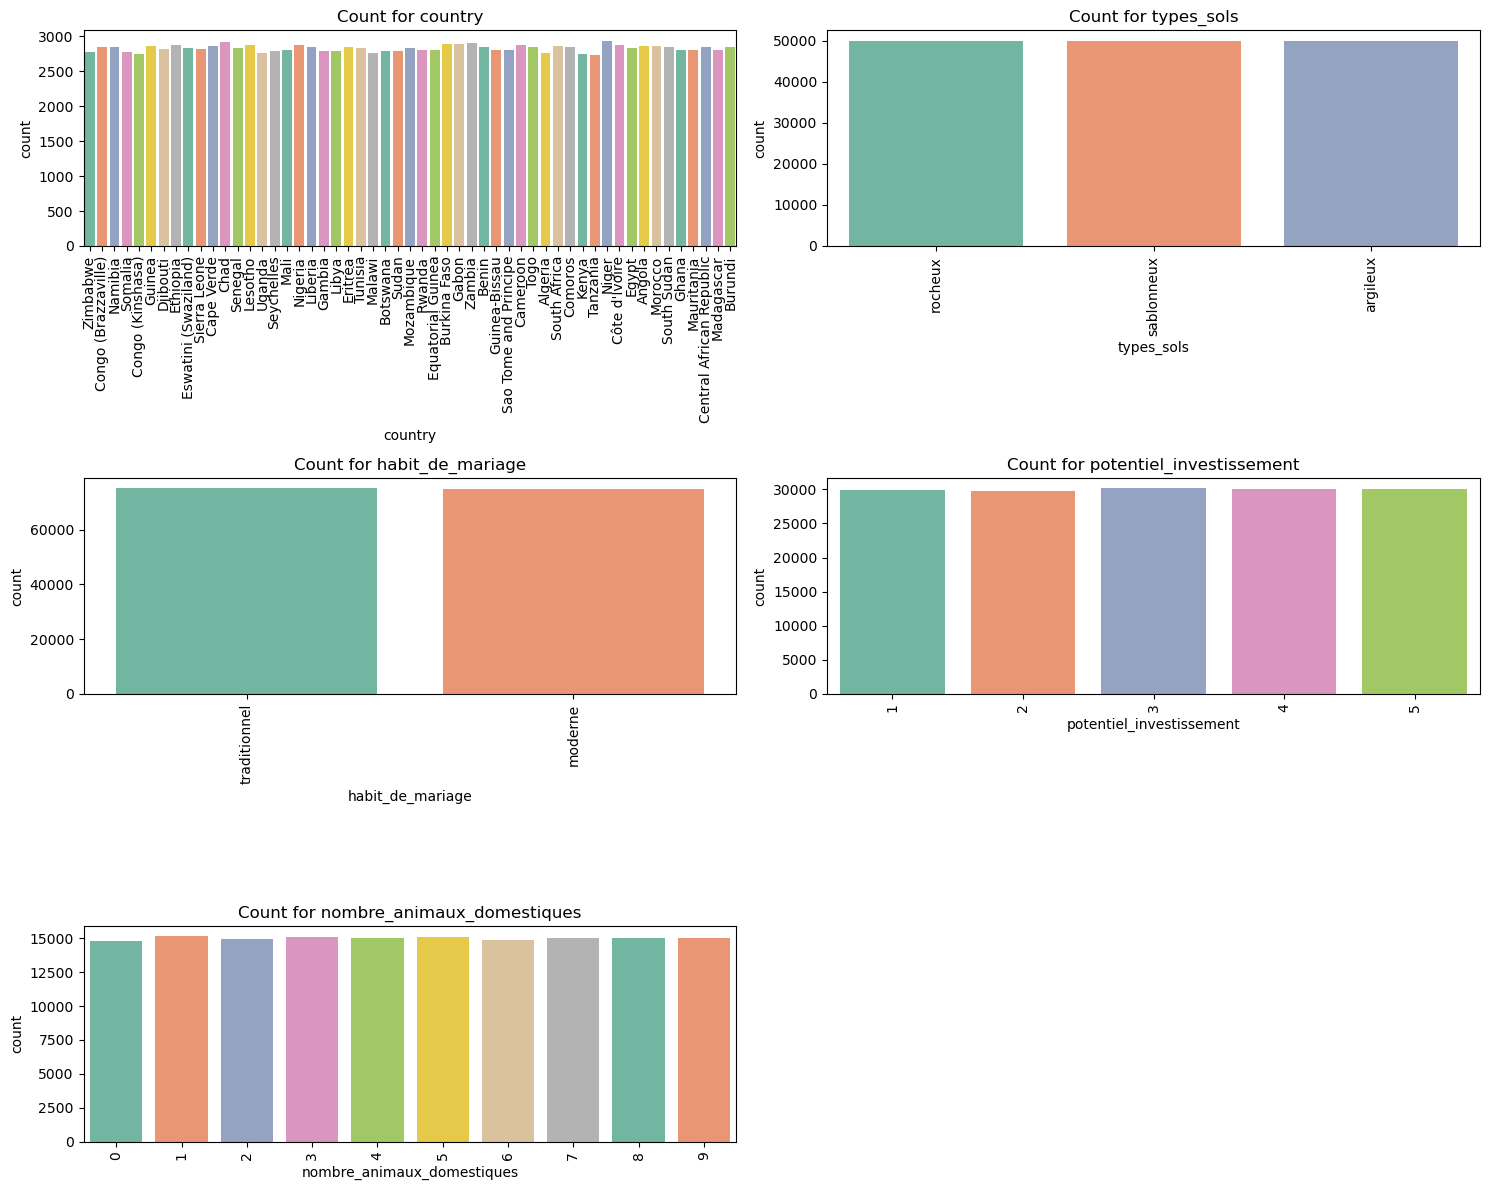

In [25]:
plot(train_df, categorical_features, 2, kind='countplot')

<font color=green> **Obvervations:** </font>

Toutes les proportions des catégories de chaque features catégorielles sont parfaitement équilibrées. Ce qui est plutot super!

### 2.2 Analyse Bivariée

#### **<span style="color:#999999;">Categorical Features</span>**

In [26]:
def plot_box_plot(df, feature_x, feature_y):
    plt.figure(figsize = (20, 5))
    order = df.groupby(feature_y)[feature_x].median().sort_values().index
    sns.boxplot(x=df[feature_y], y=df[feature_x], palette='Set2',
               order=order)
    plt.tick_params(rotation=90)
    plt.title(f"{feature_x} and {feature_y}")

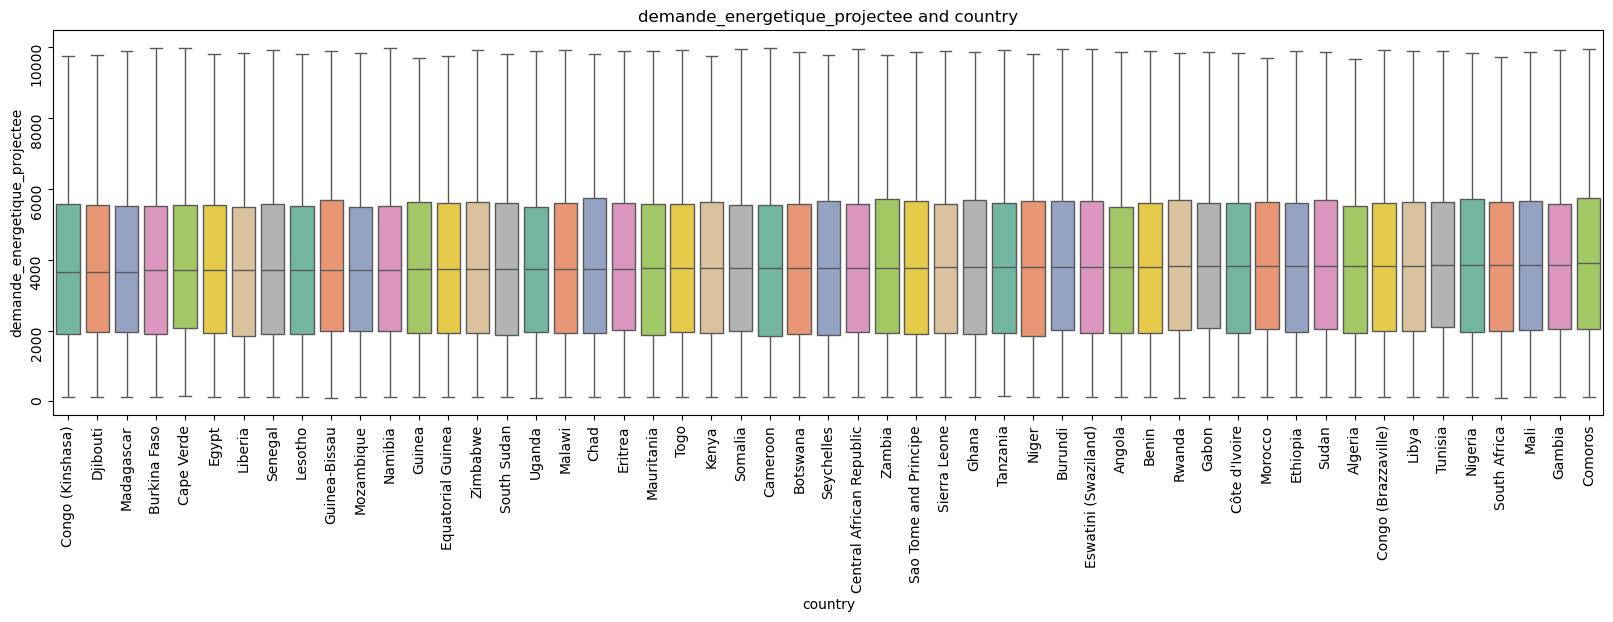

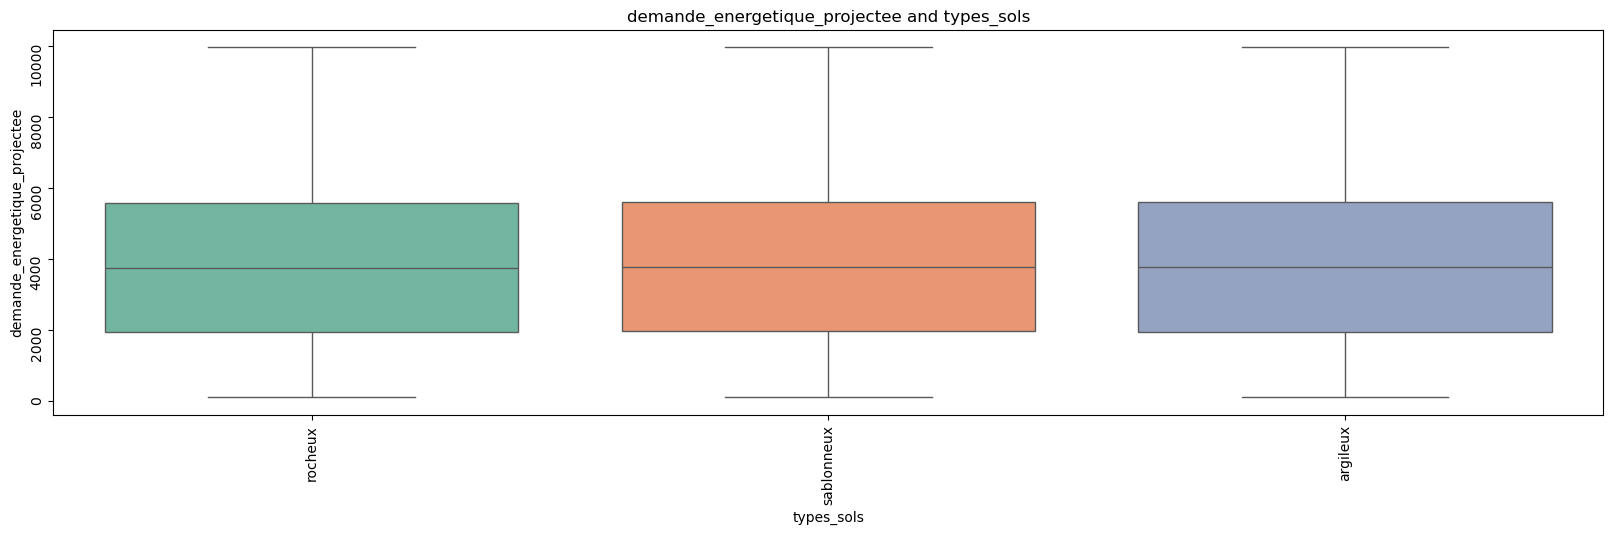

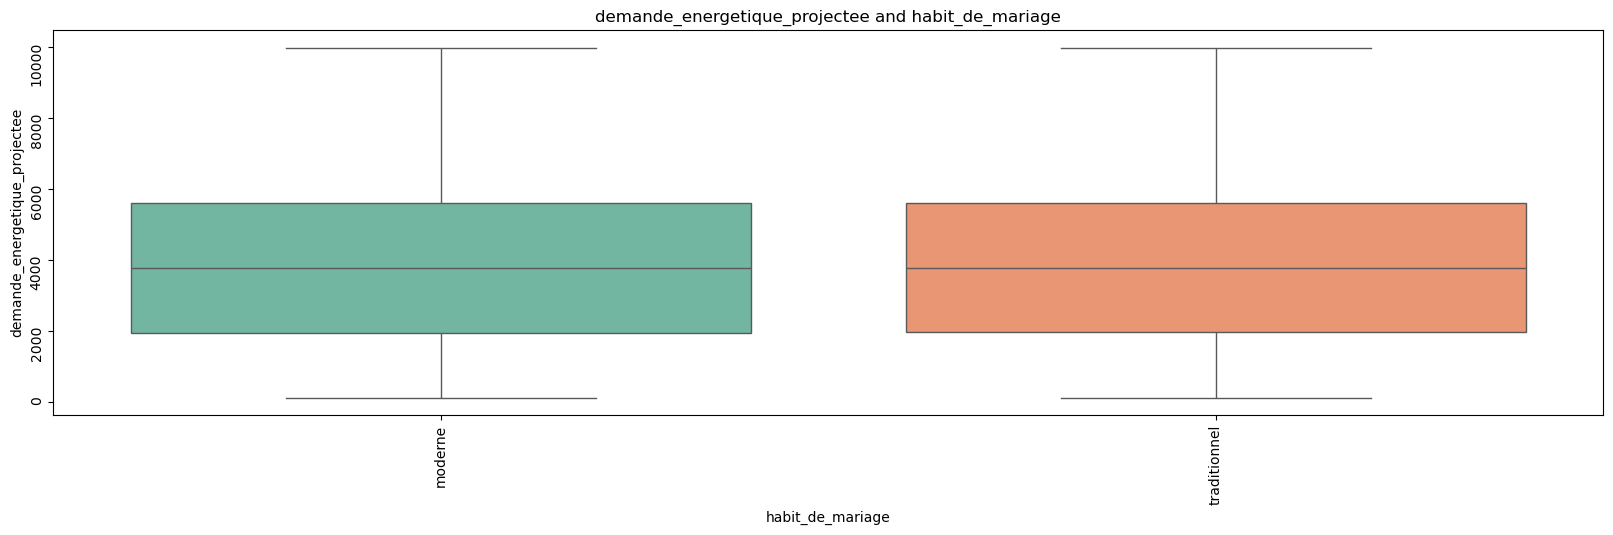

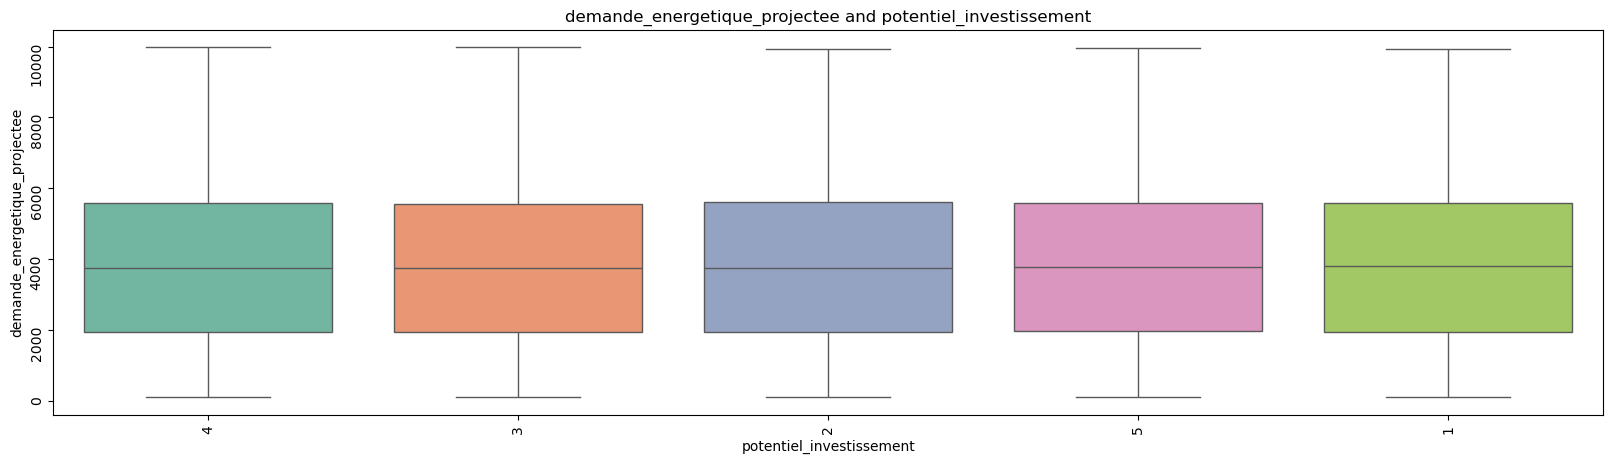

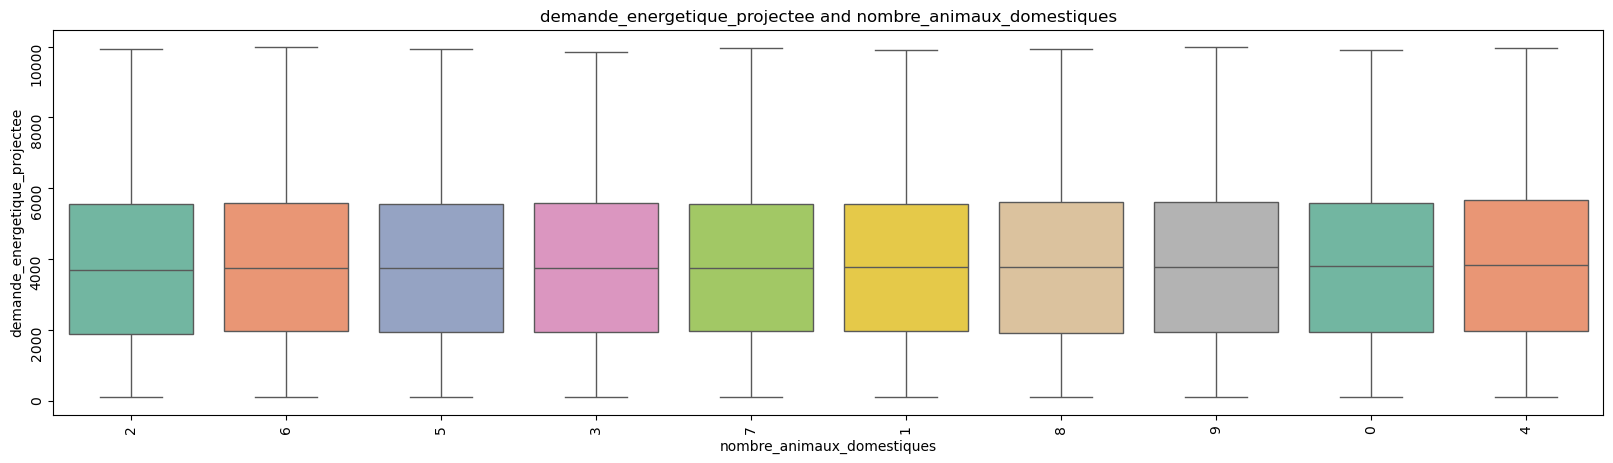

In [27]:
for feature in categorical_features:
    plot_box_plot(train_df, target, feature)

<font color=green> **Observations:** </font>

- <code>Distribution Constante</code>: Les boxplots montrent des médianes, des quartiles et des plages de valeurs identiques, cela signifie que les observations dans chaque catégorie de chaque variable catégorielle partagent des caractéristiques similaires en ce qui concerne la variable cible. 


#### **<span style="color:#999999;">Numerical Features</span>**

<Axes: >

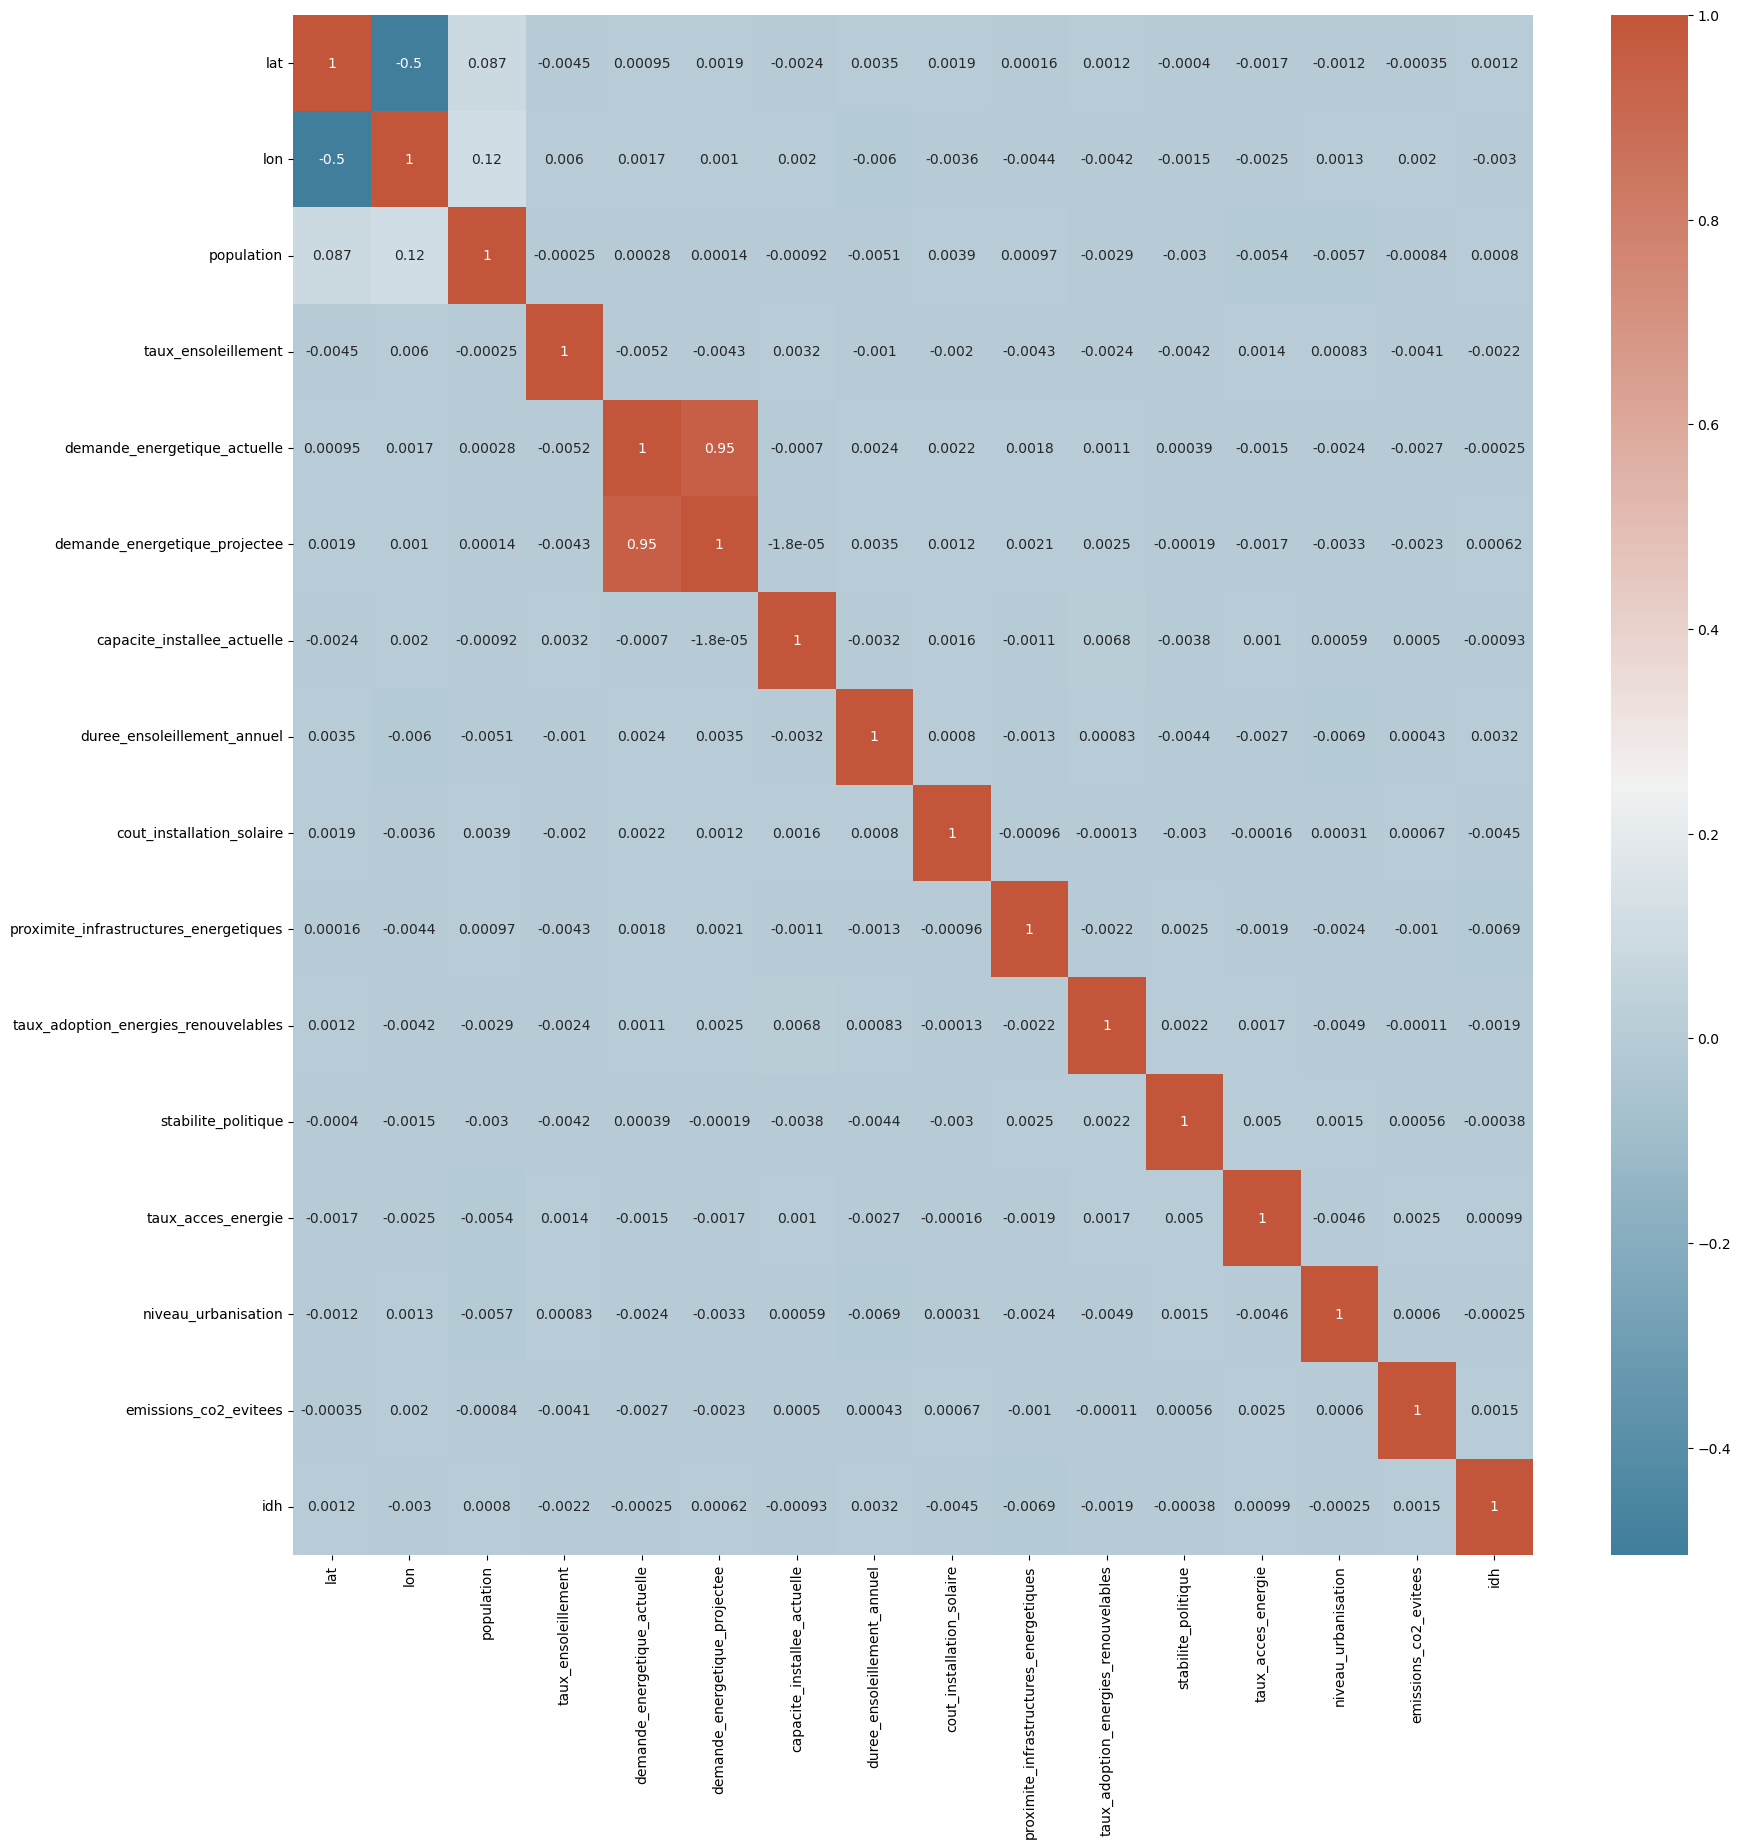

In [28]:
plt.figure(figsize=(20, 20))
correlation_matrix = train_df[numerical_features].corr(method="spearman")
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

<font color=green> **Observations:**</font>

On constate que en dehors de la feature *demande_energetique_actuel*, plus aucune feature numérique n'a une corrélation directe avec la target.

## 3- Traitement de valeurs manquantes

In [29]:
columns_with_missing_values

['taux_adoption_energies_renouvelables']

In [30]:
train_df['taux_adoption_energies_renouvelables'] = train_df['taux_adoption_energies_renouvelables'].fillna(0.0)
test_df['taux_adoption_energies_renouvelables'] = test_df['taux_adoption_energies_renouvelables'].fillna(0.0)
submission_df['taux_adoption_energies_renouvelables'] = submission_df['taux_adoption_energies_renouvelables'].fillna(0.0)

In [57]:
train_df_cleared = train_df.dropna(subset=['taux_adoption_energies_renouvelables'])
test_df_cleared = test_df.dropna(subset=['taux_adoption_energies_renouvelables'])
submission_df_cleared = submission_df.dropna(subset=['taux_adoption_energies_renouvelables'])

# II- Modeling

In [31]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import LinearSVR, SVR

import shap

In [60]:
df_train = pd.concat([train_df_cleared, test_df_cleared])

In [61]:
X_train , y = df_train.drop(columns=[target]), df_train[target]
X_test = submission_df_cleared.copy()

In [34]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

## Helper functions

In [48]:
# 1- Pour la générations du fichier csv de prédiction pour la soumission
def make_submissionCSV(predictions, test_ids):
    submission_df = pd.DataFrame()
    submission_df['id'] = test_ids
    submission_df[target] = predictions
    return submission_df

# 2-  Pour l'entrainement des models (avec validation croisée)
seed = 42

def Train_ML(model, X, y, n_splits, test=X_test, label='CAT'):
    # Variables pour stocker l'importance des features
    shap_values = 0
    perm_scores = 0

    # Variables pour l'entrainement et l'évaluation
    test_preds = np.zeros(test.shape[0])
    fold_idx = 0
    val_rmse_list = []

    cv  = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    # Boucle d'entrainement
    for train_indexes, val_indexes in cv.split(X):
        x_train, x_val = X.iloc[train_indexes], X.iloc[val_indexes]
        y_train, y_val = y.iloc[train_indexes], y.iloc[val_indexes]

        # Training
        model_clone = clone(model)
        model_clone.fit(x_train, y_train, eval_set=[(x_val, y_val)])

        perm_scores += permutation_importance(model_clone, x_val, y_val, 
                                              scoring = 'neg_root_mean_squared_error',
                                              random_state=seed, n_repeats=50).importances_mean

        if label in ['CAT', 'LGBM']:
            explainer = shap.TreeExplainer(model_clone)
            shap_values_temp = explainer.shap_values(x_val)
            shap_values += shap_values_temp[1]
        
        # Prediction and evaluation on the validation data
        val_preds = model_clone.predict(x_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        val_rmse_list.append(val_rmse)

        # Display infos
        print(f"Fold {fold_idx + 1}:")
        print(f"Validation RMSE: {val_rmse:.4f}")

        # Prediction on the test 
        test_preds_fold = model_clone.predict(test)
        test_preds += test_preds_fold
    
        fold_idx += 1

    mean_test_preds = test_preds / n_splits
    mean_val_rmse = np.mean(val_rmse_list)
    perm_scores /= n_splits
    
    print('\n')
    print('==========================================')
    print(f"Mean Validation RMSE: {mean_val_rmse:.4f}")
    print('==========================================')


    return mean_test_preds, mean_val_rmse, perm_scores, shap_values


In [49]:
# Plot features importances based on thier permutation_importance values
def plot_permutation_importance(features, feature_importances):

    feat_imp = pd.Series(feature_importances,index=features).sort_values(ascending=False)
    
    ###plot
    _, ax = plt.subplots(figsize=(20,8))
    feat_imp.plot(kind='barh', ax=ax, color="orange", edgecolor = "black")
    for index, value in enumerate(feat_imp):
        ax.text(value, index, f'{value:.2f}', va='center')
    ax.invert_yaxis()
    ax.set_title(' Permutation importance')
    plt.tight_layout()
    plt.grid()
    plt.show()


# Plot features importances based on thier SHAP 
def plot_shap_importances(features, shap_values):
    feat_imp = pd.Series(shap_values,index=features).sort_values(ascending=False)
    ###plot
    _, ax = plt.subplots(figsize=(20,8))
    feat_imp.plot(kind='barh', ax=ax, color="orange", edgecolor = "black")
    for index, value in enumerate(feat_imp):
            ax.text(value, index, f'{value:.2f}', va='center')
    ax.invert_yaxis()
    ax.set_title('cross-validated shap importance')
    plt.tight_layout()
    plt.grid()
    plt.show()

## Model 1: CAT Regressor

In [50]:
cat_params = {
    'early_stopping_rounds':25,
    'use_best_model': True,
    "loss_function": 'RMSE',
    "verbose": False ,
    'iterations': 500,
    'depth': 10,
    'l2_leaf_reg': 5,
    'cat_features': categorical_features,
} 

In [51]:
n_splits = 15

In [52]:
model = CatBoostRegressor(**cat_params)

In [53]:
predictions_cat, _, feat_scores_cat, shap_values_cat  = Train_ML(model, X_train, y, n_splits, X_test)

Fold 1:
Validation RMSE: 800.7017
Fold 2:
Validation RMSE: 804.9085
Fold 3:
Validation RMSE: 800.0504
Fold 4:
Validation RMSE: 804.0023
Fold 5:
Validation RMSE: 799.0896
Fold 6:
Validation RMSE: 795.3195
Fold 7:
Validation RMSE: 795.2084
Fold 8:
Validation RMSE: 799.8963
Fold 9:
Validation RMSE: 790.8769
Fold 10:
Validation RMSE: 801.0015
Fold 11:
Validation RMSE: 793.3218
Fold 12:
Validation RMSE: 803.0427
Fold 13:
Validation RMSE: 807.1151
Fold 14:
Validation RMSE: 797.3544
Fold 15:
Validation RMSE: 798.2710


Mean Validation RMSE: 799.3440


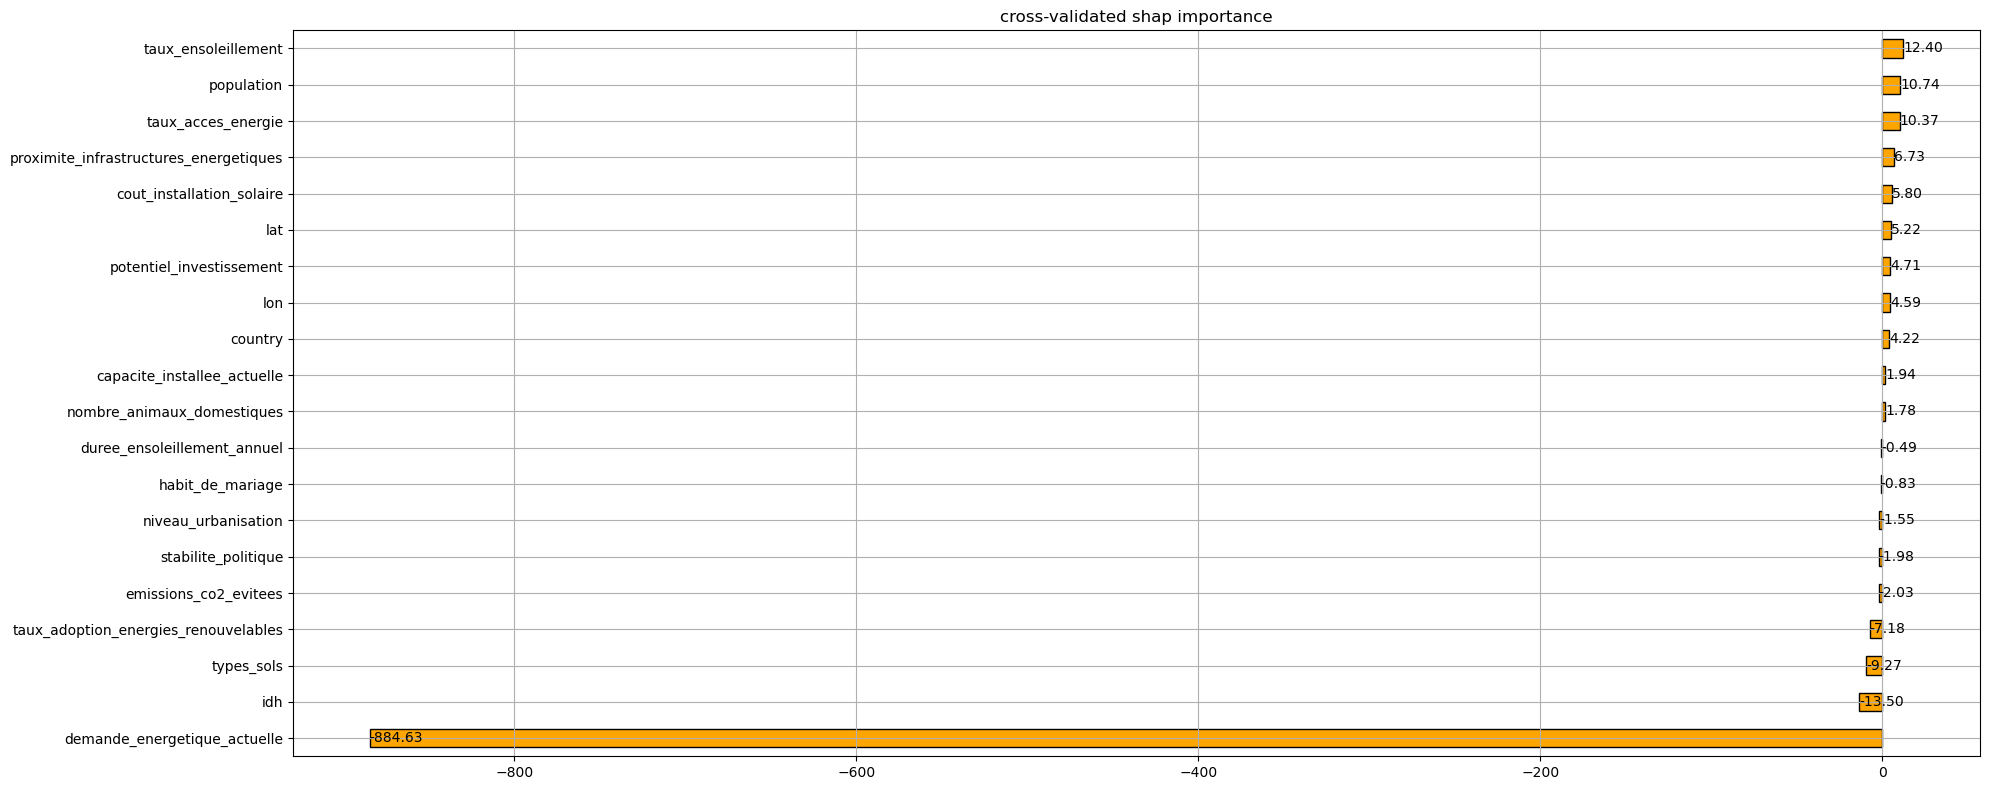

In [55]:
plot_shap_importances(X_test.columns.tolist(), shap_values_cat)

In [56]:
submission_csv = make_submissionCSV(predictions_cat, X_test.index)
submission_csv.to_csv(f"submissions/CATsubmission_v4_cv_15_17-11-24.csv", index=False)
submission_csv.head(20)

,id,demande_energetique_projectee
0,0,3504.814797
1,1,3673.715103
2,2,6125.619218
3,3,4767.411255
4,4,3925.227116
5,5,7099.361696
6,6,2602.438136
7,7,2968.430295
8,8,7342.735990
9,9,4440.951131


In [65]:
threshold = 1
features = X_test.columns
features_to_keep = features[abs(shap_values_cat) >= threshold]
features_to_keep

Index(['country', 'lat', 'lon', 'population', 'taux_ensoleillement',
       'demande_energetique_actuelle', 'capacite_installee_actuelle',
       'cout_installation_solaire', 'proximite_infrastructures_energetiques',
       'taux_adoption_energies_renouvelables', 'stabilite_politique',
       'taux_acces_energie', 'niveau_urbanisation', 'potentiel_investissement',
       'types_sols', 'emissions_co2_evitees', 'idh',
       'nombre_animaux_domestiques'],
      dtype='object')

In [66]:
new_X_train = X_train[features_to_keep]
new_X_test = X_test[features_to_keep]

new_categorical_features = [feat for feat in categorical_features if feat in features_to_keep]
new_categorical_features

['country',
 'types_sols',
 'potentiel_investissement',
 'nombre_animaux_domestiques']

In [70]:
cat_params = {
    'early_stopping_rounds':25,
    'use_best_model': True,
    "loss_function": 'RMSE',
    "verbose": False ,
    'iterations': 500,
    'depth': 10,
    'l2_leaf_reg': 5,
    'cat_features': new_categorical_features,
} 

new_model = CatBoostRegressor(**cat_params)

In [71]:
predictions_cat_d, _, feat_scores_cat_d, shap_values_cat_d  = Train_ML(new_model, new_X_train, y, n_splits, new_X_test)

Fold 1:
Validation RMSE: 800.7875
Fold 2:
Validation RMSE: 805.1176
Fold 3:
Validation RMSE: 800.0430
Fold 4:
Validation RMSE: 803.7361
Fold 5:
Validation RMSE: 798.9289
Fold 6:
Validation RMSE: 795.6373
Fold 7:
Validation RMSE: 795.9366
Fold 8:
Validation RMSE: 800.1561
Fold 9:
Validation RMSE: 790.8194
Fold 10:
Validation RMSE: 801.0283
Fold 11:
Validation RMSE: 793.3772
Fold 12:
Validation RMSE: 802.7460
Fold 13:
Validation RMSE: 806.7612
Fold 14:
Validation RMSE: 797.8079
Fold 15:
Validation RMSE: 798.2280


Mean Validation RMSE: 799.4074


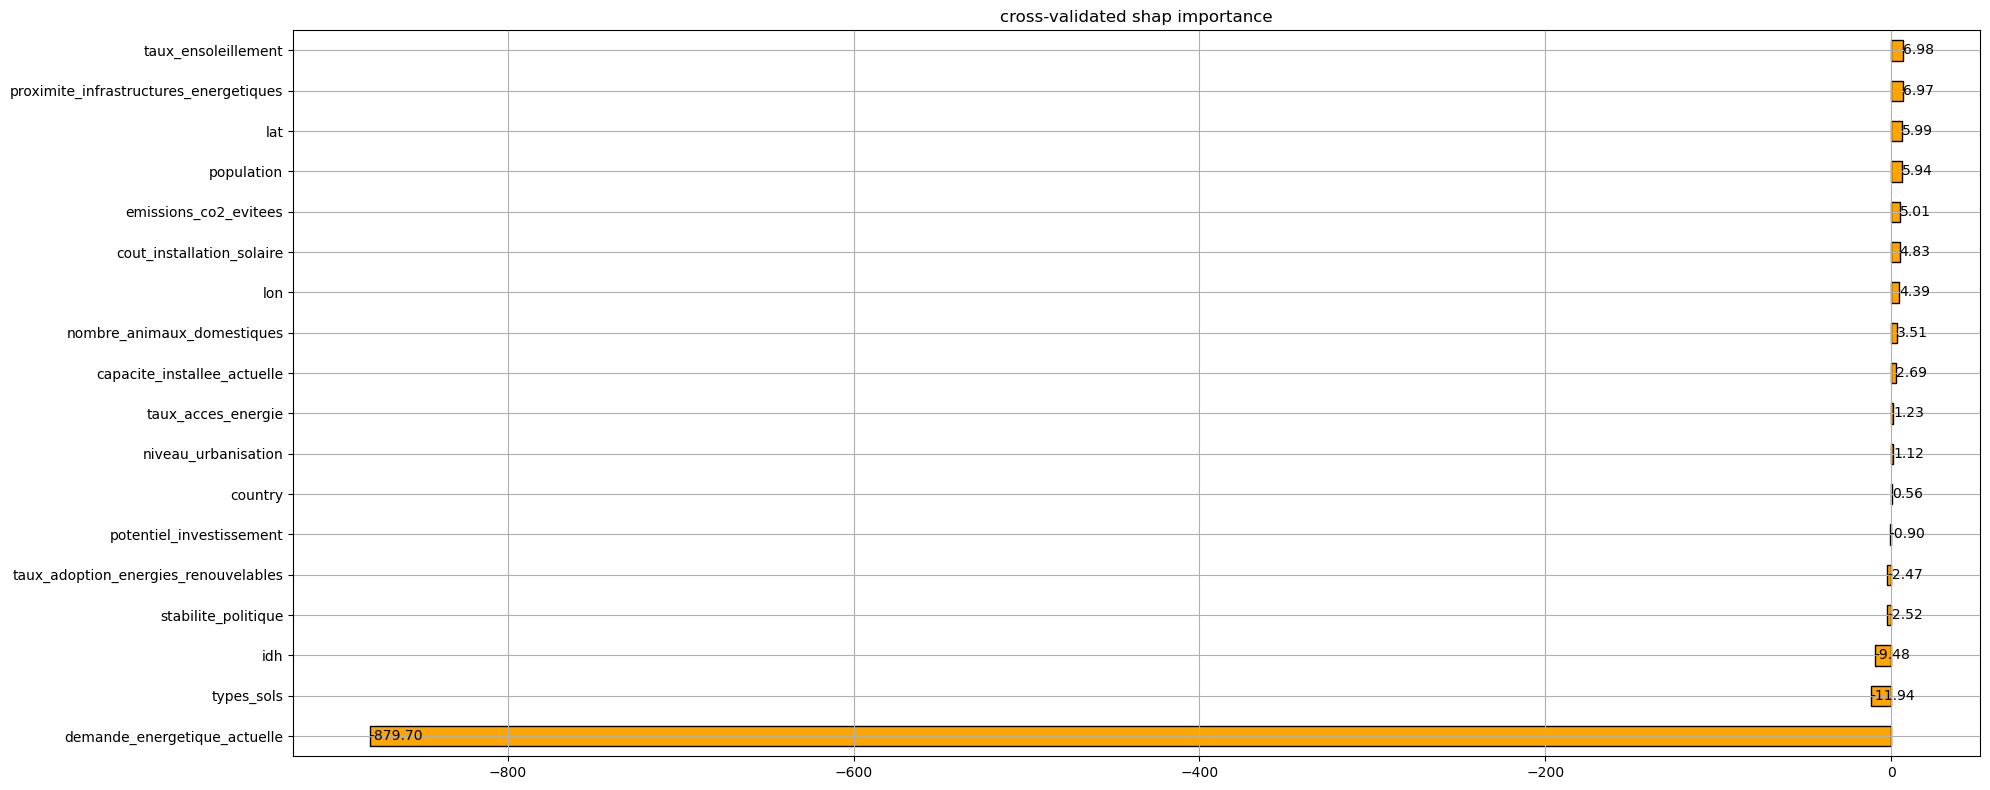

In [72]:
plot_shap_importances(features_to_keep, shap_values_cat_d)

In [73]:
submission_csv = make_submissionCSV(predictions_cat_d, X_test.index)
submission_csv.to_csv(f"submissions/CATsubmission_v5_17-11-24.csv", index=False)
submission_csv.head(20)

,id,demande_energetique_projectee
0,0,3491.327866
1,1,3667.308114
2,2,6130.814417
3,3,4780.482233
4,4,3931.099731
5,5,7077.435261
6,6,2590.701000
7,7,2967.863966
8,8,7357.039997
9,9,4425.843780


In [80]:
final_sublission = 0.5*predictions_cat + 0.5*predictions_cat_d
final_sublission = make_submissionCSV(final_sublission, X_test.index)
final_sublission.to_csv(f"submissions/CATsubmission_v5_final_17-11-24.csv", index=False)
final_sublission.head(20)

,id,demande_energetique_projectee
0,0,3498.071331
1,1,3670.511608
2,2,6128.216818
3,3,4773.946744
4,4,3928.163423
5,5,7088.398479
6,6,2596.569568
7,7,2968.147130
8,8,7349.887994
9,9,4433.397456
